In [85]:
from autoencoder import *
import torch
from tqdm import tqdm

dataset = UTKFaceDataset()
dim = 256
encoder = Encoder(encoded_space_dim=dim)
decoder = Decoder(encoded_space_dim=dim)

encoder_weights = torch.load(f"models/encoder_{dim}.pth", map_location=torch.device('cpu'))
decoder_weights = torch.load(f"models/decoder_{dim}.pth", map_location=torch.device('cpu'))

encoder.load_state_dict(encoder_weights)
decoder.load_state_dict(decoder_weights)



100%|██████████| 23705/23705 [01:10<00:00, 336.96it/s]


<All keys matched successfully>

In [89]:
from tqdm import tqdm
torch.manual_seed(1000)
# data_loader = DataLoader(dataset, batch_size=32, shuffle=False)
encoder.eval()
decoder.eval()
encoded_data_256 = []
for x in tqdm(dataset.X):
    x = encoder(torch.tensor(x.clone(), dtype=torch.float32).unsqueeze(0) / 255.0) 
    encoded_data_256.append(x.detach().numpy())


  0%|          | 0/23705 [00:00<?, ?it/s]C:\Users\peter\AppData\Local\Temp\ipykernel_10200\256061441.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = encoder(torch.tensor(x.clone(), dtype=torch.float32).unsqueeze(0) / 255.0)
100%|██████████| 23705/23705 [12:03<00:00, 32.76it/s]  


In [93]:
encoded_X_256 = np.stack(encoded_data_256).reshape(23705, 256)
# encoded_X_4096 = np.vstack(encoded_data_4096)

# np.save("encoded_data_256_2", encoded_X_256)



(23705, 256)

In [100]:
np.save("encoded_data_new", encoded_X_256)


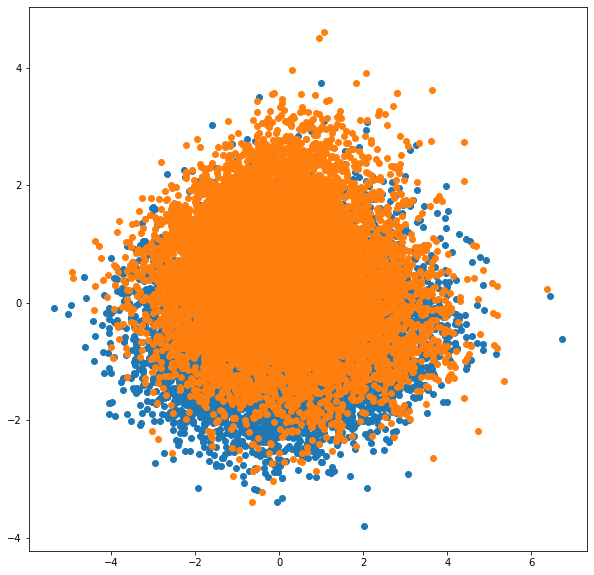

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca_X = pca.fit_transform(encoded_X_256 - np.mean(encoded_X_256, axis=0))

df = pd.read_csv("data/info.csv")
gender = df.gender
fig, ax = plt.subplots(figsize = (10,10))
for i in range(2):
    ax.scatter(pca_X[gender == i,0], pca_X[gender == i,1])

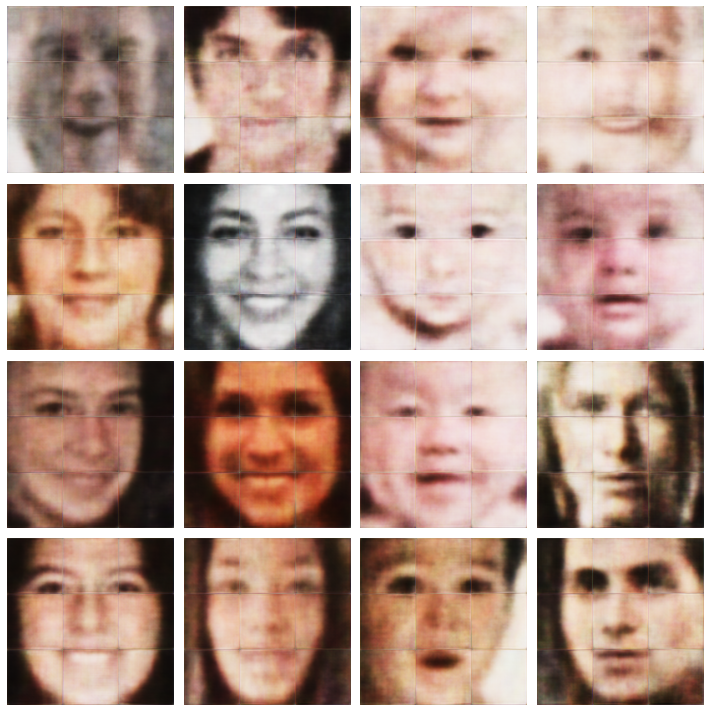

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data/info.csv")
gender = df.gender
n = 4
encoded_X = np.load("encoded_data.npy")
fig, ax = plt.subplots(n,n , figsize = (10,10))
for i in range(n**2):
    T = torch.tensor(encoded_X_256[i*200], dtype = torch.float32).unsqueeze(0)
    _ ,T_ = decoder(T)
    T_ = T_.squeeze(0).detach().numpy().reshape(200,200,3)
    ax[i % n, i // n].imshow(T_)
    ax[i % n, i // n].axis('off')

fig.tight_layout()

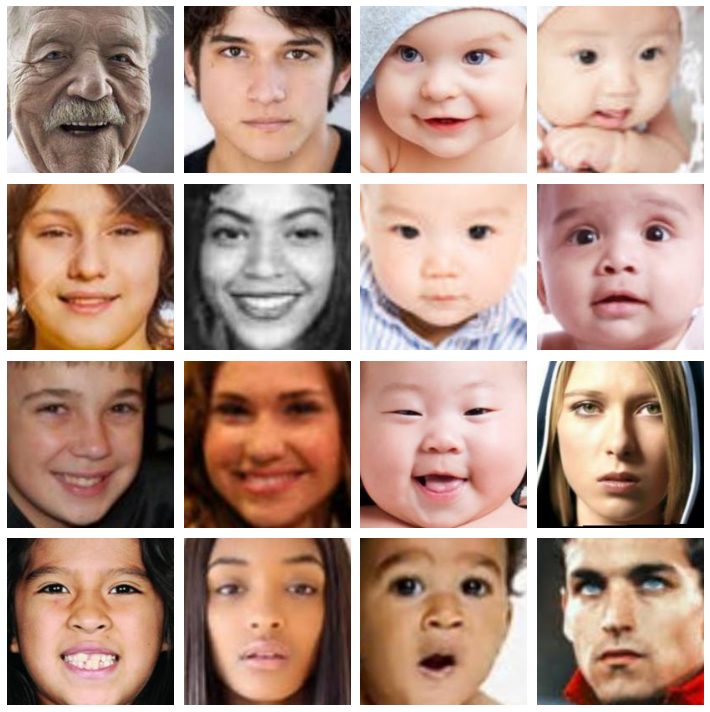

In [109]:
fig, ax = plt.subplots(n,n , figsize = (10,10))
for i in range(n**2):
    
    T = dataset.X[i*200]
    ax[i % n, i // n].imshow(T.reshape(200,200,3))
    ax[i % n, i // n].axis('off')

fig.tight_layout()

In [121]:
from sklearn.mixture import GaussianMixture
N = 10
AIC2 = np.zeros(N)
BIC2 = np.zeros(N)
for i in tqdm(range(7,N)):
    model = GaussianMixture(n_components=i + 1)
    model.fit(encoded_X_256)
    AIC2[i] = model.aic(encoded_X_256)
    BIC2[i] = model.bic(encoded_X_256)

  0%|          | 0/3 [00:00<?, ?it/s]

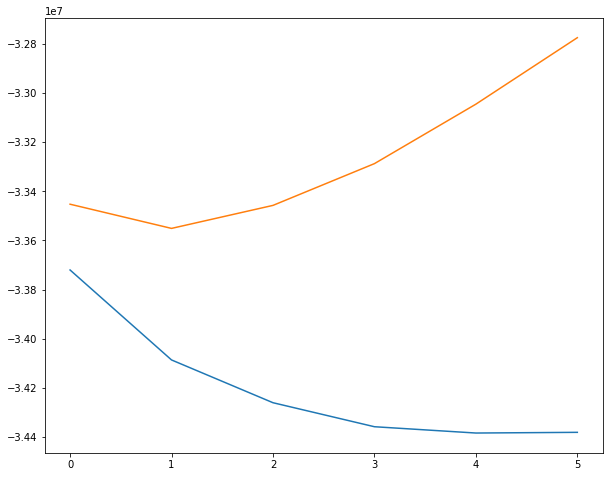

In [120]:
fig, ax = plt.subplots(figsize = (10,8))

ax.plot(AIC[:6], label="AIC")
ax.plot(BIC[:6], label="BIC")